In [2]:
import numpy as np
from optimization import hessian_free_newton, conjugate_gradients, lbfgs, gradient_descent
from oracles import create_log_reg_oracle, QuadraticOracle
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from scipy.sparse import diags
from tqdm import tqdm
%matplotlib inline

%load_ext autoreload
%autoreload 2

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Эксперимент 1

In [3]:
from scipy.sparse import diags
def generate_matrix(k,n):
    if k==1:
        diag=np.random.randint(1,n,size=1)*np.ones(n)
    else:
        diag=np.random.randint(1,k,size=n)
        diag[0]=1
        diag[1]=k
        np.random.shuffle(diag)
    return diags(diag).toarray()

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:33<00:00,  3.35s/it]


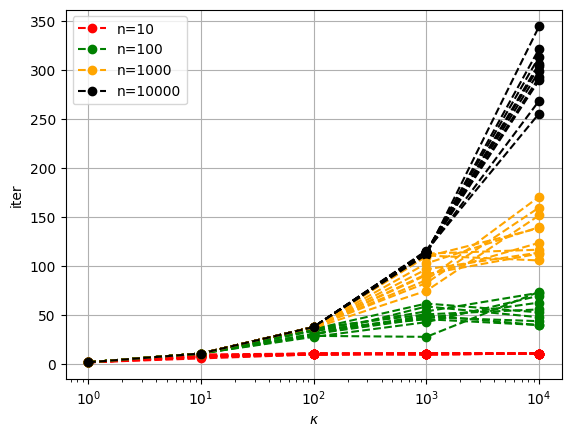

In [6]:
dim=[10,100,1000,10000]
colors=["red","green","orange","black"]
cond=[1,10,100,1000,10000]

for count in tqdm(range(10)):
    for i,n in enumerate(dim):
        y=[]
        for k in cond:
            A_logreg=generate_matrix(k,n)
            b=np.random.normal(size=(n))

            matvec=lambda x: A_logreg @ x
            x_opt, status, history = conjugate_gradients(matvec, b, np.zeros(n), trace=True)
            y.append(len(history['x']))

        plt.plot(cond, y, "--o",c=colors[i],label=n)

plt.grid()
plt.xlabel('$\kappa$')
plt.ylabel('iter')
plt.legend(["n=10","n=100","n=1000","n=10000"])
plt.xscale('log',base=10)

# Эксперимент 2

In [7]:
X, y = load_svmlight_file('../data/news20.binary.bz2',dtype=np.short)
oracle = create_log_reg_oracle(X, y, regcoef=1/X.shape[-1])

In [9]:
history_size = [1, 5, 10, 50, 100]

hs=[]
for idx, mem_size in enumerate(tqdm(history_size)):
    x_opt, status, history = lbfgs(oracle, x_0 = np.zeros(X.shape[1]), trace=True, memory_size=mem_size, tolerance=1e-13)
    hs.append(history)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [01:09<00:00, 13.95s/it]


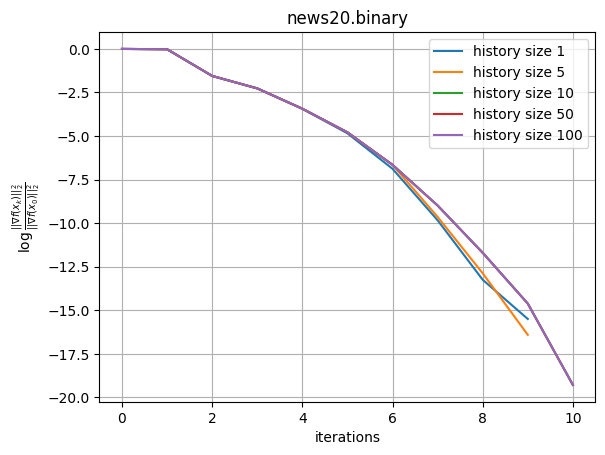

In [10]:
plt.title('news20.binary')
for i in range(len(history_size)):
    plt.plot(np.arange(len(hs[i]["time"])), np.log(hs[i]["grad_norm"]/hs[i]["grad_norm"][0]), label = f'history size {history_size[i]}')

plt.grid()
plt.xlabel('iterations')
plt.ylabel(r'$\log\frac{\left\|\|\nabla f\left(x_k\right)\right\|\|_2^2}{\left\|\|\nabla f\left(x_0\right)\right\|\|_2^2}$')
plt.legend()
plt.show()

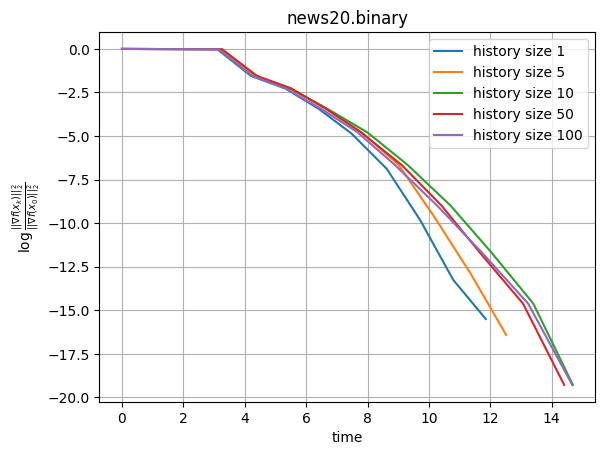

In [11]:
plt.title('news20.binary')
for i in range(len(history_size)):
    plt.plot(hs[i]["time"], np.log(hs[i]["grad_norm"]/hs[i]["grad_norm"][0]), label = f'history size {history_size[i]}')

plt.grid()
plt.xlabel('time')
plt.ylabel(r'$\log\frac{\left\|\|\nabla f\left(x_k\right)\right\|\|_2^2}{\left\|\|\nabla f\left(x_0\right)\right\|\|_2^2}$')
plt.legend()
plt.show()

# Эксперимент 3

In [13]:
X, y = load_svmlight_file('../data/real-sim.bz2',dtype=np.short)
oracle = create_log_reg_oracle(X, y, regcoef=1/X.shape[-1])

In [ ]:
x_opt, _, hist_grad = gradient_descent(oracle, x_0=np.zeros(X.shape[1]),trace=True)
x_opt, _, hist_newton = hessian_free_newton(oracle, x_0=np.zeros(X.shape[1]), trace=True)
x_opt, _, hist_lbfgs = lbfgs(oracle, x_0=np.zeros(X.shape[1]),trace=True)

In [ ]:
plt.title('real-sim')
plt.plot(np.arange(len(hist_grad["time"])), hist_grad["func"], c="orange", label="Gradient Descent")
plt.plot(np.arange(len(hist_newton["time"])), hist_newton["func"], c="green", label="HFN")
plt.plot(np.arange(len(hist_lbfgs['time'])), hist_lbfgs['func'], c='blue', label="L-BFGS")
plt.grid()
plt.xlabel('iteration')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [ ]:
plt.title('real-sim')
plt.plot(hist_grad["time"], hist_grad["func"], c="orange", label="Gradient Descent")
plt.plot(hist_newton["time"], hist_newton["func"], c="green", label="HFN")
plt.plot(hist_lbfgs['time'], hist_lbfgs['func'], c='blue', label="L-BFGS")
plt.grid()
plt.xlabel('time')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [ ]:
plt.title('real-sim')
plt.plot(hist_grad["time"], np.log(hist_grad["grad_norm"]/hist_grad["grad_norm"][0]), c="orange", label="Gradient Descent")
plt.plot(hist_newton["time"], np.log(hist_newton["grad_norm"]/hist_newton["grad_norm"][0]), c="green", label="HFN")
plt.plot(hist_lbfgs['time'],np.log(hist_lbfgs["grad_norm"]/hist_lbfgs["grad_norm"][0]), c='blue', label="L-BFGS")
plt.grid()
plt.xlabel('time')
plt.ylabel(r'$\log\frac{\left\|\|\nabla f\left(x_k\right)\right\|\|_2^2}{\left\|\|\nabla f\left(x_0\right)\right\|\|_2^2}$')
plt.legend()
plt.show()